In [1]:
import torch
import torch.nn as nn

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:

class CNN(nn.Module):
    def __init__(self,device='cpu'):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16, momentum=0.9),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32, momentum=0.5),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU()
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*3*3, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.to(device)
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [7]:
model = CNN(device=device)
model.to(device)

# load the weights, map on cpu
model.load_state_dict(torch.load('model_val_def.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

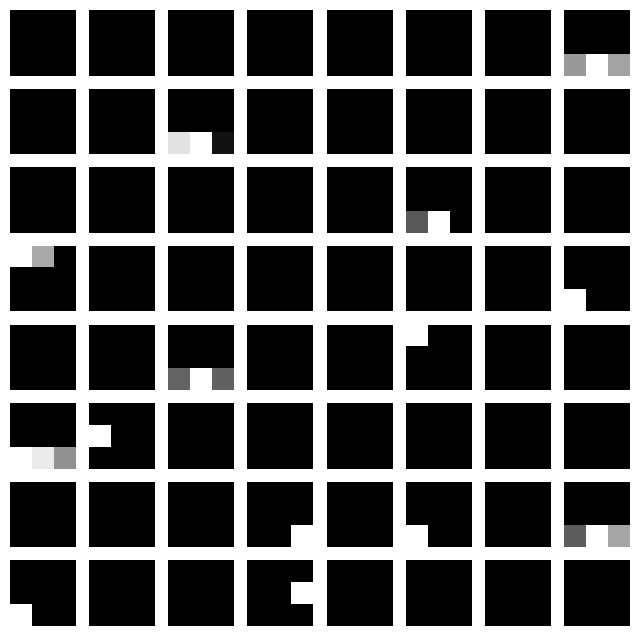

In [22]:
# load image 
from PIL import Image
import torchvision.transforms as transforms

# resize image to 50x50
img = Image.open('face.jpg')
img = img.resize((50, 50))
img = transforms.ToTensor()(img)
img = img.unsqueeze(0)

#pred = model(img)
#print(pred)

# get the feature maps
feature_maps = model.conv_layers(img)

# plot the feature maps
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_maps(feature_maps, n_row, n_col):
    fig = plt.figure(figsize=(n_col, n_row))
    for i in range(n_row*n_col):
        ax = fig.add_subplot(n_row, n_col, i+1)
        ax.imshow(feature_maps[0, i, :, :].detach().numpy(), cmap='gray')
        ax.axis('off')
    plt.show()

plot_feature_maps(feature_maps, 8, 8)


In [23]:
# get the output of the nth layer
def get_nth_layer_output(model, n, img):
    layer_output = img
    for i in range(n):
        layer_output = model[i](layer_output)
    return layer_output

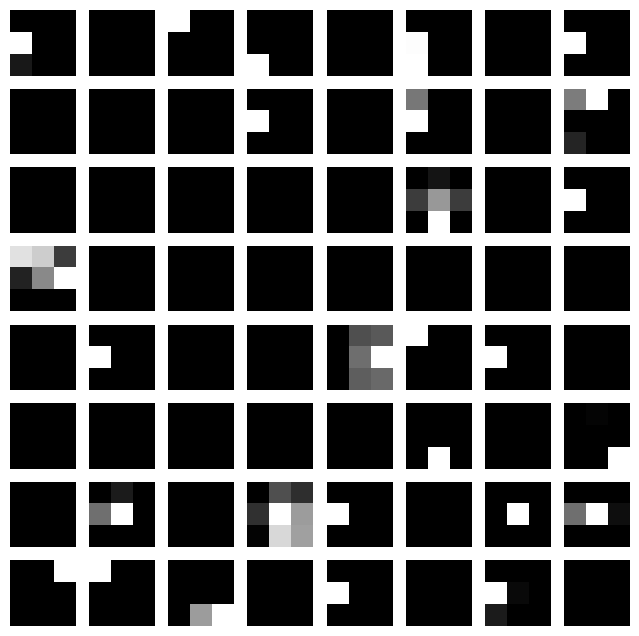

In [31]:
feature_maps = get_nth_layer_output(model.conv_layers, 34, img)

# plot the feature maps
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_maps(feature_maps, n_row, n_col):
    fig = plt.figure(figsize=(n_col, n_row))
    for i in range(n_row*n_col):
        ax = fig.add_subplot(n_row, n_col, i+1)
        ax.imshow(feature_maps[0, i, :, :].detach().numpy(), cmap='gray')
        ax.axis('off')
    plt.show()

plot_feature_maps(feature_maps, 8, 8)

tensor([[0.4913]], grad_fn=<SigmoidBackward0>)
